In [34]:
import pandas as pd

In [44]:
df = pd.read_csv("preprocessed_wo_nas.csv")

In [46]:
df

,Unnamed: 0,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,2,43.19,0,0,1,0,0,2,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,76.97,1,0,4,0,1,3,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,10,78.77,1,0,1,2,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,28,86.41,0,0,1,2,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,35,84.22,1,0,2,0,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1087,6232,71.22,1,0,4,0,0,2,5.0,...,0,0,0,0,0,1,0,1,0,1
1088,1088,6233,70.65,0,0,4,0,0,3,5.0,...,0,0,0,0,0,1,0,1,0,1
1089,1089,6237,75.62,1,0,1,0,0,0,5.0,...,0,0,0,0,0,1,0,1,0,1
1090,1090,6239,52.84,0,0,4,0,1,5,5.0,...,0,0,0,0,0,1,0,1,0,1


In [48]:
from lifelines import KaplanMeierFitter

In [49]:
kmf = KaplanMeierFitter(0.05)

In [54]:
df['chemotherapy']

0       0
1       1
2       0
3       0
4       0
       ..
1087    0
1088    0
1089    0
1090    1
1091    0
Name: chemotherapy, Length: 1092, dtype: int64

In [55]:
kmf.fit(df[df['chemotherapy'] == 0]['overall_survival_months'], df[df['chemotherapy'] == 0]['overall_survival'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 851 total observations, 483 right-censored observations>

In [56]:
kmf2 = KaplanMeierFitter(0.05)

In [57]:
kmf2.fit(df[df['chemotherapy'] == 1]['overall_survival_months'], df[df['chemotherapy'] == 1]['overall_survival'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 241 total observations, 125 right-censored observations>

<Axes: xlabel='timeline'>

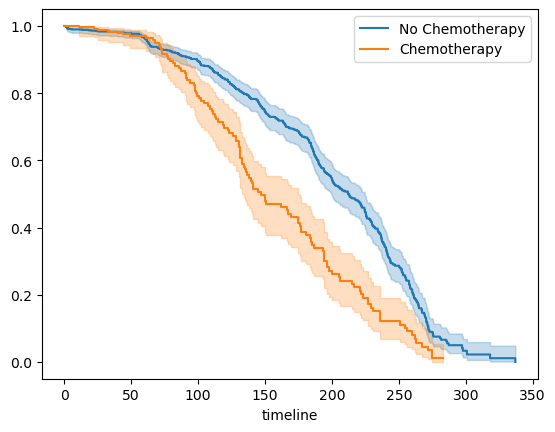

In [60]:
kmf.plot_survival_function(label = "No Chemotherapy")
kmf2.plot_survival_function(label = "Chemotherapy")

In [61]:
from lifelines import CoxPHFitter

In [68]:
cox = CoxPHFitter(penalizer = 0.0001)

In [69]:
cox.fit(df.dropna().drop(['cancer_type', 'ndfip1_mut', 'stmn2_mut', 'ccnd3_mut'], axis = 1), duration_col='overall_survival_months', event_col = 'overall_survival')

KeyboardInterrupt: 